---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [7]:
def answer_one():
    
    df = pd.read_csv("fraud_data.csv")
    
    fraud = df["Class"]
    percentage_of_fraud = sum(fraud)/len(fraud)
    return percentage_of_fraud
#answer_one()

0.016410823768035772

In [6]:
df = pd.read_csv("fraud_data.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
5,-0.713266,0.869132,0.330114,0.902275,0.520836,-0.537036,0.301955,0.209117,-0.732441,-0.266402,...,0.114405,0.412489,0.223180,-0.430522,0.109774,-0.274569,-0.108067,-0.075318,4.95,0
6,1.219060,-0.207708,0.782809,0.271655,-0.456658,0.414201,-0.675133,0.057714,0.601970,-0.178378,...,0.170372,0.541010,-0.257175,-0.904534,0.414090,0.653565,0.014583,0.027320,47.65,0
7,0.683918,0.329216,-1.693025,-1.123644,2.662177,3.563731,-0.309291,-0.043369,0.050627,-0.361619,...,1.072188,0.671990,-0.208488,0.735029,0.633444,-0.281231,0.299686,0.293389,1.00,0
8,-1.127820,1.461342,0.526673,-0.158998,0.353158,-1.539196,0.727383,0.299275,-0.778768,-1.662588,...,-0.068002,-0.494914,-0.343489,0.222014,0.541271,0.295158,-0.145161,-0.002592,0.76,0
9,-1.757794,0.821894,2.529482,-0.328198,-0.902062,0.739803,-0.119755,-0.797691,0.739508,3.458517,...,0.028491,0.778325,-0.073034,0.135780,-0.955393,-0.503613,-1.834281,-0.585528,10.00,0


In [8]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [10]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy = DummyClassifier(strategy ='most_frequent').fit(X_train, y_train)
    prediction = dummy.predict(X_test)
    
    accuracy_score = dummy.score(X_test, y_test)
    recall_score = recall_score(y_test, prediction)
    
    return (accuracy_score, recall_score)

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [12]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svc = SVC()
    svc = svc.fit(X_train, y_train)
    
    prediction = svc.predict(X_test)
    
    accuracy_score = svc.score(X_test, y_test)
    recall_score = recall_score(y_test, prediction)
    precision_score = precision_score(y_test, prediction)
    
    
    
    return (accuracy_score, recall_score, precision_score)

answer_three()


(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [18]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svc = SVC(C= 1e9, gamma = 1e-07)
    svc = svc.fit(X_train, y_train)
    
    prediction = svc.decision_function(X_test)
    
    prediction = (prediction > -220)
    
    cf_matrix = confusion_matrix(y_test, prediction)
    
    
    return cf_matrix

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


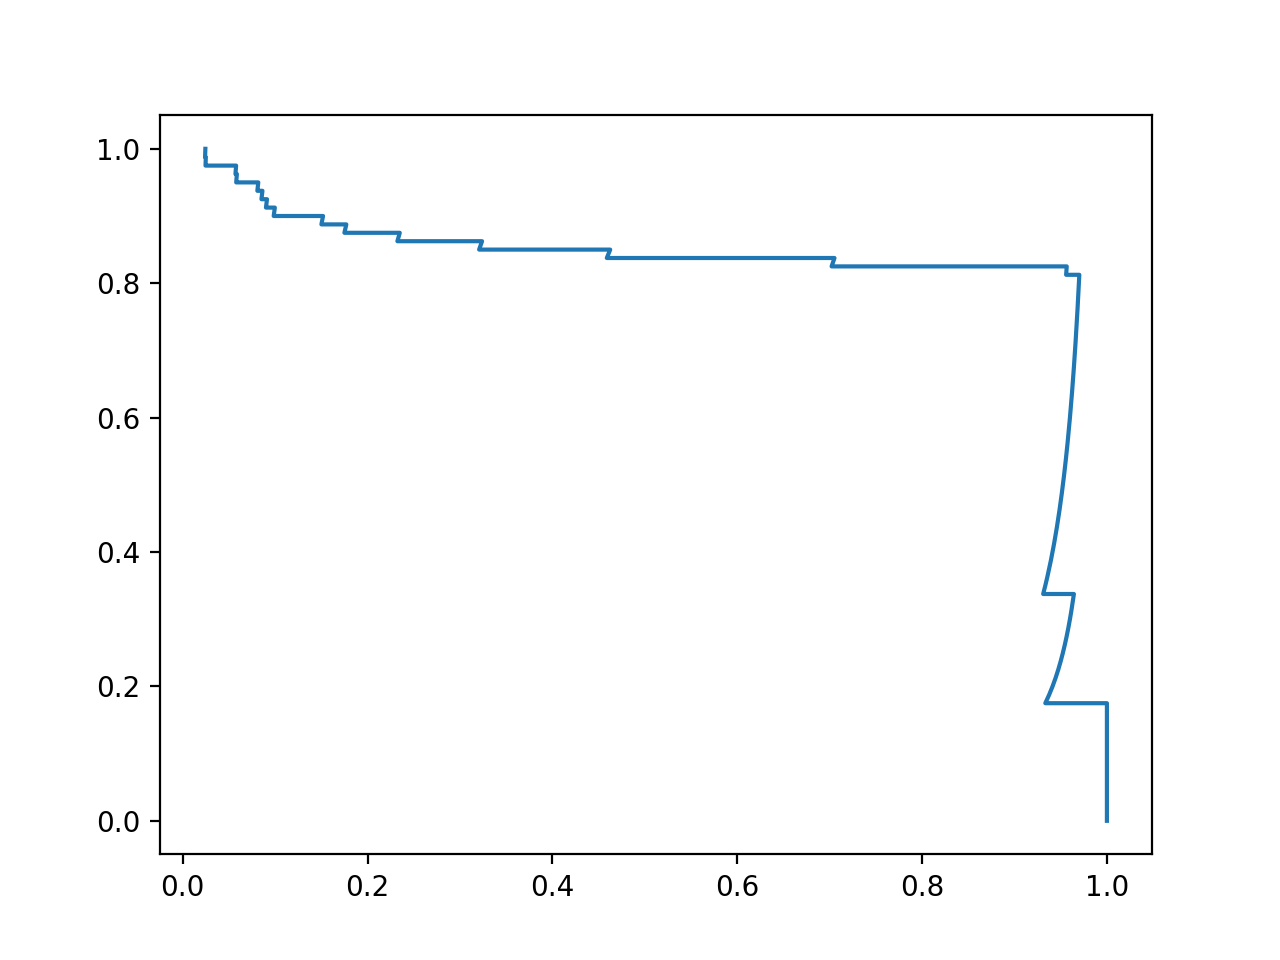

<IPython.core.display.Javascript object>


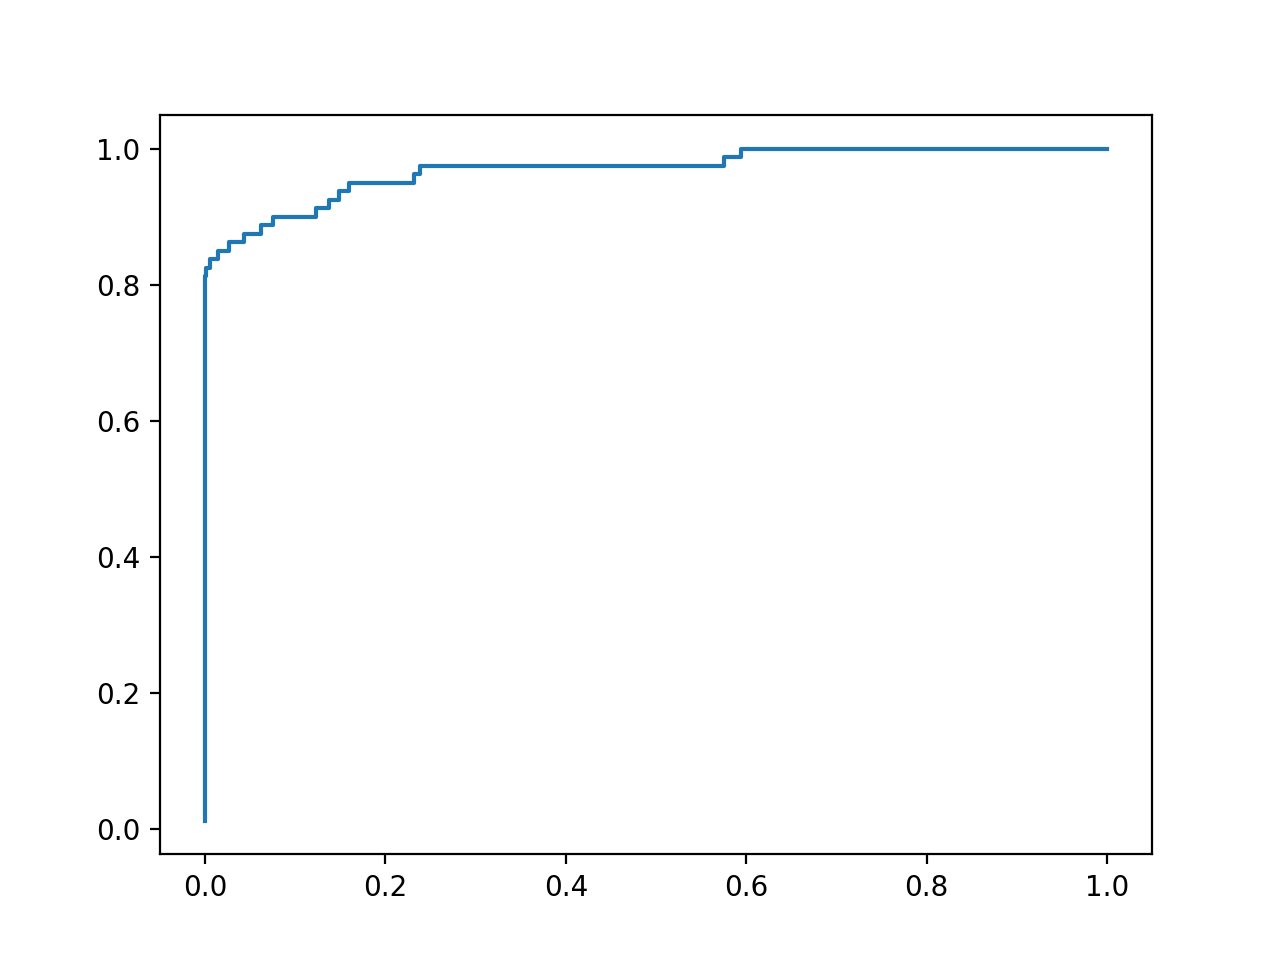

In [20]:
def answer_five():
        
    # Your code here
    
    return # Return your answer

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [30]:
def answer_six():    
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    grid_search = GridSearchCV(estimator = LogisticRegression(),
                                param_grid ={'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100] },
                                cv=3, scoring="recall")
    result_1 = grid_search.fit(X_train, y_train)
    
    result_1 = result_1.cv_results_["mean_test_score"]
    
    result_2 = result_1.reshape(5,2)
    
    
    return result_2

In [24]:
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    grid_search = GridSearchCV(estimator = LogisticRegression(),
                                param_grid ={'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100] },
                                cv=3)
    result_1 = grid_search.fit(X_train, y_train)
    
    result_1 = result_1.cv_results_["mean_test_score"]
    
    result_2 = result_1.reshape(5,2)

In [25]:
result_2

array([[ 0.99422214,  0.99539001],
       [ 0.99606614,  0.99618907],
       [ 0.99606614,  0.9961276 ],
       [ 0.99588174,  0.9959432 ],
       [ 0.99588174,  0.99588174]])

In [29]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())